In [1]:
import re
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import IntegerType
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.mllib.linalg import SparseVector, DenseVector

spark = SparkSession \
.builder \
.appName("RDD_and_DataFrame") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
#conf = SparkConf()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
lang_to_int = {}
#lang_to_int = {"C++": 0, "Java": 1, "Python": 2}
#data = sqlContext.read.option("multiLine", "true").json("user.json")


In [2]:
data.count()


2732737

In [4]:
data.printSchema()

root
 |-- _id: long (nullable = true)
 |-- bio: string (nullable = true)
 |-- blog: string (nullable = true)
 |-- company: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- email: string (nullable = true)
 |-- followers: long (nullable = true)
 |-- following: long (nullable = true)
 |-- gravatar_id: string (nullable = true)
 |-- hireable: boolean (nullable = true)
 |-- id: long (nullable = true)
 |-- location: string (nullable = true)
 |-- login: string (nullable = true)
 |-- name: string (nullable = true)
 |-- node_id: string (nullable = true)
 |-- public_gists: long (nullable = true)
 |-- public_repos: long (nullable = true)
 |-- site_admin: boolean (nullable = true)
 |-- starred: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- twitter_username: string (nullable = true)
 |-- type: string (nullable = true)
 |-- updated_at: string (nullable = true)
 |-- updated_time: struct (nullable = true)
 |    |-- $date: string (nullable = true)



In [2]:
data.select('followers', 'public_repos').distinct().count()

56199

In [2]:
data.select('_id', 'followers', 'public_repos', 'location').show()

+--------+---------+------------+---------------+
|     _id|followers|public_repos|       location|
+--------+---------+------------+---------------+
|  924695|        3|           5|           null|
| 1089376|        2|          17|             UK|
|  202696|        2|          31|        Denmark|
| 6132120|        0|           4|           null|
| 3729946|       13|           9|           null|
|19141398|        0|           7|           null|
| 1208557|        2|          12|           null|
| 1595757|        0|           0|           null|
| 4875080|        2|          69|     Redmond,WA|
| 7285115|        3|          20|           null|
|35383047|        1|           7|           null|
|17162407|       14|          30|   Tokyo, Japan|
|  632556|        2|          18|           null|
|13695988|       24|          32|          Spain|
|42935451|        1|           1|           null|
|17239114|        0|           5|           null|
| 1957356|        4|           5|           null|


In [3]:
data = data.select('_id', 'followers', 'public_repos', 'location').dropna()

In [5]:
data = data.withColumn("public_repos", data["public_repos"].cast(IntegerType()))
data = data.withColumn("followers", data["followers"].cast(IntegerType()))
# data2=data.rdd.map(lambda x: (x.userID,x.location,x.username,x.public_repos,x.followers,lang_to_int[x.language])).toDF(["userID","location","username","public_repos","followers","language"])
# data.show()
# data2.show()
# data.printSchema()
# data2.printSchema()
# data = data2

vecAss = VectorAssembler(inputCols=['public_repos', 'followers'], outputCol='features')
data_features = vecAss.transform(data).select('_id', 'features')

In [5]:
data.distinct().show()


+--------+---------+------------+
|     _id|followers|public_repos|
+--------+---------+------------+
|16592938|       24|          30|
|33535024|        1|           6|
|53271611|        0|           0|
|36817525|        1|           4|
| 3376743|        5|           1|
| 2479887|        0|           2|
|17114095|        1|          23|
|15368966|        4|          23|
|26637138|        0|           6|
|21186595|        1|           6|
|36828197|        2|           0|
|43289883|        0|          36|
| 6048007|        1|           3|
|13868446|       26|          17|
|13216546|        3|          15|
| 6887683|       34|          49|
| 3041810|        2|           7|
|44321587|        1|          10|
| 1555539|       33|          25|
|44710573|        2|           4|
+--------+---------+------------+
only showing top 20 rows



In [6]:
data.show()

+--------+---------+------------+
|     _id|followers|public_repos|
+--------+---------+------------+
|  924695|        3|           5|
| 1089376|        2|          17|
|  202696|        2|          31|
| 6132120|        0|           4|
| 3729946|       13|           9|
|19141398|        0|           7|
| 1208557|        2|          12|
| 1595757|        0|           0|
| 4875080|        2|          69|
| 7285115|        3|          20|
|35383047|        1|           7|
|17162407|       14|          30|
|  632556|        2|          18|
|13695988|       24|          32|
|42935451|        1|           1|
|17239114|        0|           5|
| 1957356|        4|           5|
| 6274582|        0|           0|
|11489395|       19|          12|
|13794190|        0|           3|
+--------+---------+------------+
only showing top 20 rows



the score is:
0.9998500995774577
the score is:
0.9996514791635039
the score is:
0.9974144075681982
the score is:
0.9987909373867745
the score is:
0.9963039605785934
the score is:
0.9963846826743168
the score is:
0.9953595103386453
the score is:
0.9924259580120679


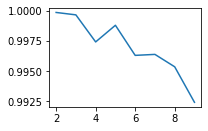

In [5]:
data = data.withColumn("public_repos", data["public_repos"].cast(IntegerType()))
data = data.withColumn("followers", data["followers"].cast(IntegerType()))
# data2=data.rdd.map(lambda x: (x.userID,x.location,x.username,x.public_repos,x.followers,lang_to_int[x.language])).toDF(["userID","location","username","public_repos","followers","language"])
# data.show()
# data2.show()
# data.printSchema()
# data2.printSchema()
# data = data2

vecAss = VectorAssembler(inputCols=['public_repos', 'followers'], outputCol='features')
data_features = vecAss.transform(data).select('_id', 'features')
#data_features.show()

silhouette_scores = []
evaluator = ClusteringEvaluator(predictionCol = 'prediction', featuresCol = 'features', metricName = 'silhouette', distanceMeasure = 'squaredEuclidean')
for i in range(3, 8):
    kmeans = KMeans(k=i, seed=0)
    km_model = kmeans.fit(data_features)
    centers = km_model.clusterCenters()
    #print(centers)
    transformed = km_model.transform(data_features)
    #transformed.show()
    score = evaluator.evaluate(transformed)
    print('the score is:')
    print(score)
    silhouette_scores.append(score)

ax = plt.subplot(222)
ax.plot(range(3,8), silhouette_scores)
plt.show()




In [6]:
data_features.sample(fraction = 0.005)

DataFrame[_id: bigint, features: vector]

In [7]:
kmeans = KMeans(k=5, seed=0)
data_features_sample = data_features.sample(fraction = 0.005)
print(data_features_sample)
print(data_features_sample.count())
data_features_sample.show()
# km_model = kmeans.fit(data_features_sample)
# centers = km_model.clusterCenters()
#print(centers)
# transformed = km_model.transform(data_features_sample)
# features_rows = transformed.select('features').collect()
# result_rows = transformed.select('prediction').collect()


DataFrame[_id: bigint, features: vector]
5662
+--------+------------+
|     _id|    features|
+--------+------------+
|41450662|   [0.0,2.0]|
|44058367|   [0.0,2.0]|
|15077828|   [3.0,2.0]|
|26894614|  [13.0,4.0]|
|20092292|  [21.0,0.0]|
|13802344|   [7.0,3.0]|
|10029805|   [0.0,3.0]|
|13856291|  [19.0,0.0]|
|19791357|   [7.0,1.0]|
|18501696|  [11.0,1.0]|
|34459766|  [10.0,2.0]|
|15216270|[66.0,106.0]|
|12819986| [20.0,22.0]|
|29512793|  [19.0,2.0]|
| 1725099|  [17.0,2.0]|
|17337794| [25.0,10.0]|
|20161657|   [3.0,3.0]|
| 2035443|  [27.0,5.0]|
|57865841|   [2.0,7.0]|
|31701616| [29.0,92.0]|
+--------+------------+
only showing top 20 rows



km_model = kmeans.fit(data_features_sample)

In [14]:
centers = km_model.clusterCenters()
#print(centers)
transformed = km_model.transform(data_features_sample)
features_rows = transformed.select('features').collect()
result_rows = transformed.select('prediction').collect()

In [15]:
features_rows

[Row(features=DenseVector([0.0, 2.0])),
 Row(features=DenseVector([0.0, 2.0])),
 Row(features=DenseVector([3.0, 2.0])),
 Row(features=DenseVector([13.0, 4.0])),
 Row(features=DenseVector([21.0, 0.0])),
 Row(features=DenseVector([7.0, 3.0])),
 Row(features=DenseVector([0.0, 3.0])),
 Row(features=DenseVector([19.0, 0.0])),
 Row(features=DenseVector([7.0, 1.0])),
 Row(features=DenseVector([11.0, 1.0])),
 Row(features=DenseVector([10.0, 2.0])),
 Row(features=DenseVector([66.0, 106.0])),
 Row(features=DenseVector([20.0, 22.0])),
 Row(features=DenseVector([19.0, 2.0])),
 Row(features=DenseVector([17.0, 2.0])),
 Row(features=DenseVector([25.0, 10.0])),
 Row(features=DenseVector([3.0, 3.0])),
 Row(features=DenseVector([27.0, 5.0])),
 Row(features=DenseVector([2.0, 7.0])),
 Row(features=DenseVector([29.0, 92.0])),
 Row(features=DenseVector([3.0, 2.0])),
 Row(features=DenseVector([71.0, 2.0])),
 Row(features=DenseVector([27.0, 28.0])),
 Row(features=DenseVector([31.0, 18.0])),
 Row(features=Dens

In [16]:
from pyspark.mllib.linalg import SparseVector, DenseVector

features_list = [DenseVector(row.features.toArray()).tolist() for row in features_rows]
result_list = [row.prediction for row in result_rows]
# print(result_list)


In [18]:
result_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


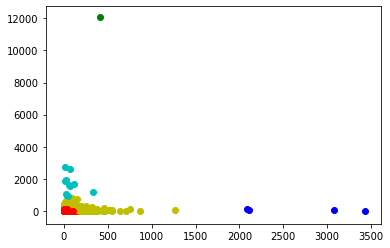

In [20]:
color = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
#ax2 = plt.subplot(111, projection='3d')
ax2 = plt.subplot(111)
for i in range(0, len(features_list)):
    ax2.scatter(features_list[i][0],features_list[i][1],c=color[result_list[i]])
plt.show()

In [21]:
len(result_list)

5662

In [22]:
data.show()

+--------+---------+------------+--------------------+
|     _id|followers|public_repos|            location|
+--------+---------+------------+--------------------+
| 1089376|        2|          17|                  UK|
|  202696|        2|          31|             Denmark|
| 4875080|        2|          69|          Redmond,WA|
|17162407|       14|          30|        Tokyo, Japan|
|13695988|       24|          32|               Spain|
|11489395|       19|          12|     Berlin, Germany|
|20260799|        4|           4|Zielona Góra, Poland|
|13738458|        3|          16|              London|
| 9111402|       25|          47|               Dhaka|
| 7584896|        1|          19|          Hooper, UT|
|41450662|        2|           0|  Eureka, California|
|  736057|       28|          32|        Oslo, Norway|
|10464666|        0|           5|              België|
|   19884|       76|          14|    Hamburg, Germany|
|   92231|        2|          27|     Ontario, Canada|
| 3831832|

In [23]:
data.count()

1104333

In [24]:
data.select('location').distinct().count()

131154

In [25]:
data = sqlContext.read.option("multiLine", "true").json("user.json")

In [28]:
data.select('starred')

DataFrame[starred: array<string>]

In [2]:
data2 = data.sample(fraction = 0.00001)

In [3]:
data2.count()

20

In [4]:
data2.columns

['_id',
 'bio',
 'blog',
 'company',
 'created_at',
 'email',
 'followers',
 'following',
 'gravatar_id',
 'hireable',
 'id',
 'location',
 'login',
 'name',
 'node_id',
 'public_gists',
 'public_repos',
 'site_admin',
 'starred',
 'twitter_username',
 'type',
 'updated_at',
 'updated_time']

In [ ]:
data2.select('_id',
 'bio',
 'blog',
 'company',
 'created_at',
 'email',
 'followers',
 'following',
 'gravatar_id',
 'hireable',
 'id',
 'location',
 'login',
 'name',
 'node_id',
 'public_gists',
 'public_repos',
 'site_admin',
 'twitter_username',
 'type').show()

In [2]:
parquet1 = sqlContext.read.format('parquet').load('C:/Users/Vera/Desktop/Big-Data Analytics Technology/Project/new_repo_data/part0.parquet')
print(parquet1.count())
parquet2 = sqlContext.read.format('parquet').load('C:/Users/Vera/Desktop/Big-Data Analytics Technology/Project/new_repo_data/part1.parquet')
print(parquet2.count())

6590
28239


In [4]:
#toy = sqlContext.read.format('json').load('C:/Users/Vera/Desktop/Big-Data Analytics Technology/Project/joindata.json')
#toy.show()

+---------+--------+---------+------------+------+--------+
|followers|language| location|public_repos|userID|username|
+---------+--------+---------+------------+------+--------+
|       49|     C++|Singapore|          41|     0|     abc|
|        1|     C++|Singapore|           5|     1|   jason|
|      200|    Java|Singapore|          30|     2|   joker|
|      300|    Java|    China|          40|     3| panther|
|       12|  Python|    China|          10|     4|     fox|
|       30|     C++|Singapore|          20|     5|   abcde|
|      100|  Python|    Japan|          32|     6|    vera|
|      320|    Java|    India|          35|     7|       V|
|        6|     C++|    China|           6|     8|   queen|
|      130|    Java|    China|          23|     9|   jiali|
|      348|  Python|    India|          63|    10|   muhit|
|       10|  Python|    India|           7|    11|     aac|
|        0|    Java|Singapore|           3|    12|     ada|
|       52|     C++|    Japan|          

In [3]:
parquet_union = parquet1.union(parquet2)
print(parquet_union.count()) # 34829
parquet_union.show()
tmp = parquet_union.dropDuplicates(['owner_id'])
print(tmp.count()) # 17858
tmp.show()
print(parquet_union.select('owner_id').distinct().count()) # 17858
parquet_union = tmp

34829
+---+--------+------------+
| id|owner_id|    language|
+---+--------+------------+
|  1|       1|        Ruby|
| 26|       4|        Ruby|
| 27|  317747|           C|
| 28|       1|        Ruby|
| 35|       2|        Ruby|
| 36|       2|        Ruby|
| 42|      21|        Ruby|
| 43|      21|        Ruby|
| 52|      27|  JavaScript|
| 53|      27|  JavaScript|
| 54|      27|  JavaScript|
| 56|      27|ActionScript|
| 63|       2|        Ruby|
| 65|       4|        null|
| 68|      22|        Ruby|
| 71|      37|        Ruby|
| 74|      37|        Ruby|
| 93|       2|        Ruby|
| 98|      46|        Ruby|
|105|      21|        Ruby|
+---+--------+------------+
only showing top 20 rows

17858
+-------+--------+-----------+
|     id|owner_id|   language|
+-------+--------+-----------+
|   1453|    1088|       Ruby|
| 898571|    1580|      Scala|
| 926574|    1591|Objective-C|
|  12264|    2122|       null|
|  38151|    2142|       Ruby|
|  40724|    3749|       Ruby|
|   6541|  

In [4]:
data = sqlContext.read.option("multiLine", "true").json("user.json")

In [6]:
data.count()

2732737

In [5]:
data = data.select('_id', 'followers', 'public_repos')
joinedData = data.join(parquet_union, data._id == parquet_union.owner_id)
print(joinedData.count())

11122


In [6]:
joinedData.printSchema()
joinedData.show()

root
 |-- _id: long (nullable = true)
 |-- followers: long (nullable = true)
 |-- public_repos: long (nullable = true)
 |-- id: integer (nullable = true)
 |-- owner_id: integer (nullable = true)
 |-- language: string (nullable = true)

+------+---------+------------+-------+--------+--------+
|   _id|followers|public_repos|     id|owner_id|language|
+------+---------+------------+-------+--------+--------+
| 19884|       76|          14|  40705|   19884|     C++|
|425499|       19|          96|1172277|  425499|  Python|
|123238|       51|          29| 302148|  123238|  Python|
|237980|      122|          17| 638413|  237980|  Python|
|271847|       89|          24| 692508|  271847|       C|
| 49014|      147|          67| 431116|   49014|  Python|
|204914|       16|          29| 547475|  204914|       C|
| 40213|      194|          80| 673094|   40213|  Python|
|160658|       25|          38| 613047|  160658|  Python|
|195480|       30|           3| 506385|  195480|  Python|
| 84050|  

In [7]:

joinedData = joinedData.select('owner_id', 'public_repos', 'followers', 'language')
print(joinedData.count())
joinedData.show()

11122
+--------+------------+---------+--------+
|owner_id|public_repos|followers|language|
+--------+------------+---------+--------+
|   19884|          14|       76|     C++|
|  425499|          96|       19|  Python|
|  123238|          29|       51|  Python|
|  237980|          17|      122|  Python|
|  271847|          24|       89|       C|
|   49014|          67|      147|  Python|
|  204914|          29|       16|       C|
|   40213|          80|      194|  Python|
|  160658|          38|       25|  Python|
|  195480|           3|       30|  Python|
|   84050|           6|       15|     C++|
|   13339|           4|        6|  Python|
|   27990|          74|      381|       C|
|    3634|          66|       87|       C|
|   61135|          14|       23|  Python|
|   42682|          42|       16|  Python|
|   38706|          53|      127|  Python|
|    1287|          82|      104|   Shell|
|  168115|         119|       46|  Python|
|   40331|          67|       34|    Ruby|
+----

In [9]:
languages = joinedData.select('language').distinct()
print(languages.count())
languages.show()

languages = languages.collect()
lang_list = [row.language for row in languages]

index = 0
for lang in lang_list:
    lang_to_int[lang] = index
    index = index + 1
    
print(lang_to_int)

116
+----------------+
|        language|
+----------------+
|              C#|
|         FORTRAN|
|     Standard ML|
|Rich Text Format|
|       YASnippet|
|        Makefile|
|      Processing|
|          Scheme|
|             Arc|
|            Vala|
|            Haxe|
|             XML|
|           Perl6|
|      JavaScript|
|            SCSS|
|      Emacs Lisp|
|            TSQL|
|          Eiffel|
|            Perl|
|          Puppet|
+----------------+
only showing top 20 rows

{'C#': 0, 'FORTRAN': 1, 'Standard ML': 2, 'Rich Text Format': 3, 'YASnippet': 4, 'Makefile': 5, 'Processing': 6, 'Scheme': 7, 'Arc': 8, 'Vala': 9, 'Haxe': 10, 'XML': 11, 'Perl6': 12, 'JavaScript': 13, 'SCSS': 14, 'Emacs Lisp': 15, 'TSQL': 16, 'Eiffel': 17, 'Perl': 18, 'Puppet': 19, None: 20, 'Erlang': 21, 'Matlab': 22, 'QML': 23, 'Objective-J': 24, 'C++': 25, 'F#': 26, 'Groovy': 27, 'TeX': 28, 'OCaml': 29, 'Dart': 30, 'LilyPond': 31, 'AutoHotkey': 32, 'ActionScript': 33, 'Visual Basic': 34, 'D': 35, 'Agda': 3

In [26]:
data = joinedData
data = data.withColumn("public_repos", data["public_repos"].cast(IntegerType()))
data = data.withColumn("followers", data["followers"].cast(IntegerType()))

#data2 = sqlContext.createDataFrame(dataRDD.collect(), ["userID","public_repos","followers","language"])

#data2.show()
#data2.printSchema()
# data = data2

vecAss = VectorAssembler(inputCols=['public_repos', 'followers'], outputCol='features')
data_features = vecAss.transform(data).select('owner_id', 'features')

In [27]:

kmeans = KMeans(k=3, seed=0)
data_features_sample = data_features.sample(fraction = 0.5)
print(data_features_sample)
print(data_features_sample.count())
data_features_sample.show()

DataFrame[owner_id: int, features: vector]
5537
+--------+------------+
|owner_id|    features|
+--------+------------+
|   19884| [14.0,76.0]|
|  425499| [96.0,19.0]|
|  123238| [29.0,51.0]|
|  237980|[17.0,122.0]|
|  271847| [24.0,89.0]|
|   49014|[67.0,147.0]|
|  160658| [38.0,25.0]|
|   84050|  [6.0,15.0]|
|   13339|   [4.0,6.0]|
|   27990|[74.0,381.0]|
|    3634| [66.0,87.0]|
|   42682| [42.0,16.0]|
|   38706|[53.0,127.0]|
|  369009|  [5.0,13.0]|
|   51116| [18.0,17.0]|
|  238690| [83.0,44.0]|
|  398211| [11.0,61.0]|
|  595872|[114.0,33.0]|
|   69426| [14.0,51.0]|
|   92551|[19.0,115.0]|
+--------+------------+
only showing top 20 rows



[array([ 71.35040234, 172.51389905]), array([  205.4, 32596. ]), array([ 172.90625 , 6021.984375])]


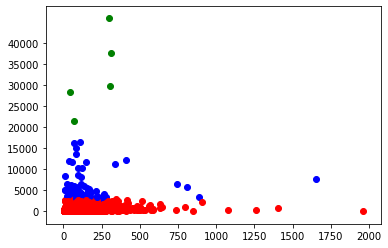

In [33]:
km_model = kmeans.fit(data_features_sample)
centers = km_model.clusterCenters()
print(centers)
transformed = km_model.transform(data_features_sample)
features_rows = transformed.select('features').collect()
result_rows = transformed.select('prediction').collect()

from pyspark.mllib.linalg import SparseVector, DenseVector

features_list = [DenseVector(row.features.toArray()).tolist() for row in features_rows]
result_list = [row.prediction for row in result_rows]

color = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
#ax2 = plt.subplot(111, projection='3d')
ax = plt.subplot(111)
ax.set_yticks([i for i in range(0, 45000, 5000)])
for i in range(0, len(features_list)):
    ax.scatter(features_list[i][0],features_list[i][1],c=color[result_list[i]])
plt.show()

In [34]:
transformed.show()

+--------+------------+----------+
|owner_id|    features|prediction|
+--------+------------+----------+
|   19884| [14.0,76.0]|         0|
|  425499| [96.0,19.0]|         0|
|  123238| [29.0,51.0]|         0|
|  237980|[17.0,122.0]|         0|
|  271847| [24.0,89.0]|         0|
|   49014|[67.0,147.0]|         0|
|  160658| [38.0,25.0]|         0|
|   84050|  [6.0,15.0]|         0|
|   13339|   [4.0,6.0]|         0|
|   27990|[74.0,381.0]|         0|
|    3634| [66.0,87.0]|         0|
|   42682| [42.0,16.0]|         0|
|   38706|[53.0,127.0]|         0|
|  369009|  [5.0,13.0]|         0|
|   51116| [18.0,17.0]|         0|
|  238690| [83.0,44.0]|         0|
|  398211| [11.0,61.0]|         0|
|  595872|[114.0,33.0]|         0|
|   69426| [14.0,51.0]|         0|
|   92551|[19.0,115.0]|         0|
+--------+------------+----------+
only showing top 20 rows



In [39]:
#print(transformed.count()) # 5537
print(transformed.filter('prediction == 0').count()) # 5468
print(transformed.filter('prediction == 1').count()) # 5
print(transformed.filter('prediction == 2').count()) # 64

5468
5
64


In [2]:
parquet1 = sqlContext.read.format('parquet').load('C:/Users/Vera/Desktop/Big-Data Analytics Technology/Project/new_repo_data/part0.parquet')
print(parquet1.count())
parquet2 = sqlContext.read.format('parquet').load('C:/Users/Vera/Desktop/Big-Data Analytics Technology/Project/new_repo_data/part1.parquet')
print(parquet2.count())
parquet1.show()

6590
28239
+---+--------+------------+
| id|owner_id|    language|
+---+--------+------------+
|  1|       1|        Ruby|
| 26|       4|        Ruby|
| 27|  317747|           C|
| 28|       1|        Ruby|
| 35|       2|        Ruby|
| 36|       2|        Ruby|
| 42|      21|        Ruby|
| 43|      21|        Ruby|
| 52|      27|  JavaScript|
| 53|      27|  JavaScript|
| 54|      27|  JavaScript|
| 56|      27|ActionScript|
| 63|       2|        Ruby|
| 65|       4|        null|
| 68|      22|        Ruby|
| 71|      37|        Ruby|
| 74|      37|        Ruby|
| 93|       2|        Ruby|
| 98|      46|        Ruby|
|105|      21|        Ruby|
+---+--------+------------+
only showing top 20 rows



In [6]:
import pyspark.sql.functions as F
df = parquet1.groupBy("owner_id").agg(F.collect_list(parquet1['language']).alias('languages'))
df.show()

+--------+--------------------+
|owner_id|           languages|
+--------+--------------------+
|    1088|[Ruby, Ruby, Ruby...|
|    2122|              [Ruby]|
|    2142|  [Ruby, Ruby, Ruby]|
|    3749|  [Ruby, Ruby, Ruby]|
|    4519|[Ruby, Puppet, Pu...|
|    5518|              [Ruby]|
|    6336|              [Ruby]|
|    7253|              [Ruby]|
|    7833|              [Ruby]|
|    7982|             [Shell]|
|   10206|              [Ruby]|
|   16861|  [Perl, Perl, Perl]|
|   25517|        [JavaScript]|
|   31367|  [Java, JavaScript]|
|   33375|        [Emacs Lisp]|
|   33412|        [JavaScript]|
|   41890|              [Ruby]|
|   67294|            [Scheme]|
|   72578|               [C++]|
|   78400|                [C#]|
+--------+--------------------+
only showing top 20 rows



In [9]:
pair = df.rdd.map(lambda x: (x.owner_id, x.languages))
pair.collect()

[(1088, ['Ruby', 'Ruby', 'Ruby', 'Ruby']),
 (2122, ['Ruby']),
 (2142, ['Ruby', 'Ruby', 'Ruby']),
 (3749, ['Ruby', 'Ruby', 'Ruby']),
 (4519, ['Ruby', 'Puppet', 'Puppet', 'Puppet', 'Ruby']),
 (5518, ['Ruby']),
 (6336, ['Ruby']),
 (7253, ['Ruby']),
 (7833, ['Ruby']),
 (7982, ['Shell']),
 (10206, ['Ruby']),
 (16861, ['Perl', 'Perl', 'Perl']),
 (25517, ['JavaScript']),
 (31367, ['Java', 'JavaScript']),
 (33375, ['Emacs Lisp']),
 (33412, ['JavaScript']),
 (41890, ['Ruby']),
 (67294, ['Scheme']),
 (72578, ['C++']),
 (78400, ['C#']),
 (85749, ['C#']),
 (271109, ['Ruby']),
 (991149, ['Ruby']),
 (4023140, ['Python']),
 (1721, ['Ruby', 'JavaScript']),
 (1896,
  ['Python', 'Python', 'Python', 'Python', 'Python', 'Python', 'Python']),
 (1990, ['Shell']),
 (4161, ['Python']),
 (6623, ['Ruby']),
 (15003, ['Ruby']),
 (17607, ['C', 'Ruby']),
 (22021, ['C']),
 (26699, ['C++', 'C++']),
 (43741, ['JavaScript']),
 (50451, ['Ruby']),
 (51388, ['Objective-C']),
 (53630, ['PHP']),
 (60965, ['Python', 'Python'

In [11]:
parquet_union = parquet1.union(parquet2)
languages = parquet_union.select('language').distinct()
print(languages.count())
languages.show()

languages = languages.collect()
lang_list = [row.language for row in languages]

index = 0
for lang in lang_list:
    lang_to_int[lang] = index
    index = index + 1
    
print(lang_to_int)

169
+----------------+
|        language|
+----------------+
|              C#|
|            Less|
|            Hack|
|         FORTRAN|
|     Standard ML|
|       YASnippet|
|Rich Text Format|
|        Makefile|
|      Processing|
|             Arc|
|          Scheme|
|              M4|
|            LLVM|
|            Vala|
|          G-code|
|             XML|
|          Perl 6|
|            Haxe|
|   SystemVerilog|
|           Perl6|
+----------------+
only showing top 20 rows

{'C#': 0, 'Less': 1, 'Hack': 2, 'FORTRAN': 3, 'Standard ML': 4, 'YASnippet': 5, 'Rich Text Format': 6, 'Makefile': 7, 'Processing': 8, 'Arc': 9, 'Scheme': 10, 'M4': 11, 'LLVM': 12, 'Vala': 13, 'G-code': 14, 'XML': 15, 'Perl 6': 16, 'Haxe': 17, 'SystemVerilog': 18, 'Perl6': 19, 'Rust': 20, 'Brightscript': 21, 'JavaScript': 22, 'SCSS': 23, 'Emacs Lisp': 24, 'TSQL': 25, 'Eiffel': 26, 'Perl': 27, 'Puppet': 28, 'CartoCSS': 29, None: 30, 'Erlang': 31, 'Self': 32, 'Smarty': 33, 'Game Maker Language': 34, 'Matlab': 3

In [16]:
#lang_to_int['Java']
length = len(lang_list)
print(length)
def lang_to_vec(languages):
    vec = [0] * length
    for lang in languages:
        vec[lang_to_int[lang]] = 1
    return vec

#lang_to_vec(['Ruby', 'Puppet', 'Puppet', 'Puppet', 'Ruby'])

169


In [18]:
df = parquet_union.groupBy("owner_id").agg(F.collect_list(parquet1['language']).alias('languages'))
df.show()
print(df.count())

+--------+--------------------+
|owner_id|           languages|
+--------+--------------------+
|    1088|[Ruby, Ruby, Ruby...|
|    2122|       [Ruby, Shell]|
|    2142|[Ruby, Ruby, Ruby...|
|    3749|  [Ruby, Ruby, Ruby]|
|    4519|[Ruby, Puppet, Pu...|
|    5518|[Ruby, VimL, Ruby...|
|    6336|              [Ruby]|
|    7253|        [Ruby, Ruby]|
|    7833|              [Ruby]|
|    7982|             [Shell]|
|   10206|              [Ruby]|
|   16861|[Perl, Perl, Perl...|
|   25517|        [JavaScript]|
|   31367|[Java, JavaScript...|
|   33375|        [Emacs Lisp]|
|   33412|[JavaScript, Cloj...|
|   41890|              [Ruby]|
|   67294|[Scheme, JavaScri...|
|   72578|               [C++]|
|   78400|                [C#]|
+--------+--------------------+
only showing top 20 rows

17858


In [19]:
pair = df.rdd.map(lambda x: (x.owner_id, lang_to_vec(x.languages)))
pair_list = pair.collect()
print(pair_list[0])

(1088, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [24]:
newFrame = sqlContext.createDataFrame(pair_list, ['userID', 'languages'])
newFrame.show()

+------+--------------------+
|userID|           languages|
+------+--------------------+
|  1088|[0, 0, 0, 0, 0, 0...|
|  2122|[0, 0, 0, 0, 0, 0...|
|  2142|[0, 0, 0, 0, 0, 0...|
|  3749|[0, 0, 0, 0, 0, 0...|
|  4519|[0, 0, 0, 0, 0, 0...|
|  5518|[0, 0, 0, 0, 0, 0...|
|  6336|[0, 0, 0, 0, 0, 0...|
|  7253|[0, 0, 0, 0, 0, 0...|
|  7833|[0, 0, 0, 0, 0, 0...|
|  7982|[0, 0, 0, 0, 0, 0...|
| 10206|[0, 0, 0, 0, 0, 0...|
| 16861|[0, 0, 0, 0, 0, 0...|
| 25517|[0, 0, 0, 0, 0, 0...|
| 31367|[0, 0, 0, 0, 0, 0...|
| 33375|[0, 0, 0, 0, 0, 0...|
| 33412|[0, 0, 0, 0, 0, 0...|
| 41890|[0, 0, 0, 0, 0, 0...|
| 67294|[0, 0, 0, 0, 0, 0...|
| 72578|[0, 0, 0, 0, 0, 0...|
| 78400|[1, 0, 0, 0, 0, 0...|
+------+--------------------+
only showing top 20 rows



In [44]:
import math
import numpy as np
def lang_to_vec(languages):
    vec = [0] * length
    for lang in languages:
        vec[lang_to_int[lang]] = 1
    # vec # result[0]
    
    # Normalization
    #num = len(set(languages))
    #if(num == 0):
    #    print(str(languages) + '  ' + str(num))
    #else:
    #    for i in range(0, len(vec)):
    #        vec[i] = vec[i] / math.sqrt(num)
        
    # vec # result[1]
    #target = [1] * length
    #cosine_sim = np.dot(vec,target) / (np.linalg.norm(vec) * np.linalg.norm(target))
    # cosine_sim # result[2]
    
    return vec
lang_to_vec(['Ruby', 'Java'])   

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [63]:
pair = df.rdd.map(lambda x: (x.owner_id, lang_to_vec(x.languages)))
pair_list = pair.collect()
print(pair_list[0])
print(pair_list[1])

newFrame = sqlContext.createDataFrame(pair_list, ['userID', 'languages'])
newFrame.show()

(1088, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(2122, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
target = [1] * length
result = []
for pair in pair_list:
    vec = pair[1]
    num = vec.count(1)
    if(num != 0):
        #print('the num is:' + str(num))
        #print(pair)
        for i in range(0, len(vec)):
            vec[i] = vec[i] / math.sqrt(num)
    
        cosine_sim = np.dot(vec,target) / (np.linalg.norm(vec) * np.linalg.norm(target))
        result.append((pair[0], pair[1], cosine_sim))
    else:
        print('the num is:' + str(num))
        print(pair)
    
#print(result[0])

the num is:0
(58061, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(302855, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

the num is:0
(74178, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(89310, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

the num is:0
(96917, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(135143, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

the num is:0
(2796, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(7944, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

the num is:0
(221365, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(324925, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

the num is:0
(141273, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(161621, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

the num is:0
(38206, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(76757, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

the num is:0
(283676, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(23903, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

the num is:0
(20028, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(66973, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

the num is:0
(637455, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(50, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

the num is:0
(68190, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(51541, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

the num is:0
(210749, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(639823, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

the num is:0
(6458, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(146792, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

the num is:0
(56009, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(46005, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

the num is:0
(45521, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
the num is:0
(7129, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
print(len(result))
print(len(pair_list))

17256
17858


In [76]:
print(result[0])
print(result[1])

(1088, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.07692307692307693)
(2122, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [38]:
df.show()

+--------+--------------------+
|owner_id|           languages|
+--------+--------------------+
|    1088|[Ruby, Ruby, Ruby...|
|    2122|       [Ruby, Shell]|
|    2142|[Ruby, Ruby, Ruby...|
|    3749|  [Ruby, Ruby, Ruby]|
|    4519|[Ruby, Puppet, Pu...|
|    5518|[Ruby, VimL, Ruby...|
|    6336|              [Ruby]|
|    7253|        [Ruby, Ruby]|
|    7833|              [Ruby]|
|    7982|             [Shell]|
|   10206|              [Ruby]|
|   16861|[Perl, Perl, Perl...|
|   25517|        [JavaScript]|
|   31367|[Java, JavaScript...|
|   33375|        [Emacs Lisp]|
|   33412|[JavaScript, Cloj...|
|   41890|              [Ruby]|
|   67294|[Scheme, JavaScri...|
|   72578|               [C++]|
|   78400|                [C#]|
+--------+--------------------+
only showing top 20 rows



In [75]:
parquet_union[parquet_union.owner_id == 58061].show()

+------+--------+--------+
|    id|owner_id|language|
+------+--------+--------+
|831293|   58061|    null|
+------+--------+--------+



In [96]:
#newFrame = sqlContext.createDataFrame(pair_list, ['userID', 'languages'])
#newFrame.show()
#import pandas as pd
#pd.DataFrame(result)
tmp = [(i[0], i[1], float(i[2])) for i in result]
newFrame = sqlContext.createDataFrame(tmp, ['userID', 'lang_vec', 'cos_sim'])
newFrame.show()

+------+--------------------+-------------------+
|userID|            lang_vec|            cos_sim|
+------+--------------------+-------------------+
|  1088|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
|  2122|[0.0, 0.0, 0.0, 0...|0.10878565864408424|
|  2142|[0.0, 0.0, 0.0, 0...|0.17200522903844537|
|  3749|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
|  4519|[0.0, 0.0, 0.0, 0...|0.13323467750529827|
|  5518|[0.0, 0.0, 0.0, 0...|0.13323467750529827|
|  6336|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
|  7253|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
|  7833|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
|  7982|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
| 10206|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
| 16861|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
| 25517|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
| 31367|[0.0, 0.0, 0.0, 0...|0.15384615384615385|
| 33375|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
| 33412|[0.0, 0.0, 0.0, 0...|0.10878565864408424|
| 41890|[0.0, 0.0, 0.0, 0...|0.07692307692307693|


In [97]:
data = sqlContext.read.option("multiLine", "true").json("user.json")
data = data.select('_id', 'followers', 'public_repos')
joinedData = data.join(newFrame, data._id == newFrame.userID)
joinedData.show()

+-----+---------+------------+------+--------------------+-------------------+
|  _id|followers|public_repos|userID|            lang_vec|            cos_sim|
+-----+---------+------------+------+--------------------+-------------------+
|   26|     1244|          77|    26|[0.0, 0.0, 0.0, 0...|0.13323467750529827|
|  474|       86|          66|   474|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
| 1697|      118|          10|  1697|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
| 1950|       64|          29|  1950|[0.0, 0.0, 0.0, 0...|0.10878565864408424|
| 2214|      645|         162|  2214|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
| 3091|       40|         109|  3091|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
| 4590|      217|          58|  4590|[0.0, 0.0, 0.0, 0...|0.07692307692307693|
| 5385|       69|          61|  5385|[0.0, 0.0, 0.0, 0...|0.13323467750529827|
| 6721|       57|          41|  6721|[0.0, 0.0, 0.0, 0...|0.18842228790639834|
| 9715|       41|          51|  9715|[0.0, 0.0, 0.0,

In [98]:
data = joinedData
data = data.withColumn("public_repos", data["public_repos"].cast(IntegerType()))
data = data.withColumn("followers", data["followers"].cast(IntegerType()))

vecAss = VectorAssembler(inputCols=['public_repos', 'followers', 'cos_sim'], outputCol='features')
data_features = vecAss.transform(data).select('userID', 'features')
data_features.show()

+------+--------------------+
|userID|            features|
+------+--------------------+
|    26|[77.0,1244.0,0.13...|
|   474|[66.0,86.0,0.0769...|
|  1697|[10.0,118.0,0.076...|
|  1950|[29.0,64.0,0.1087...|
|  2214|[162.0,645.0,0.07...|
|  3091|[109.0,40.0,0.076...|
|  4590|[58.0,217.0,0.076...|
|  5385|[61.0,69.0,0.1332...|
|  6721|[41.0,57.0,0.1884...|
|  9715|[51.0,41.0,0.0769...|
| 16597|[31.0,28.0,0.0769...|
| 17499|[109.0,241.0,0.07...|
| 22245|[28.0,137.0,0.076...|
| 25479|[35.0,17.0,0.0769...|
| 27563|[46.0,49.0,0.1087...|
| 32912|[9.0,23.0,0.07692...|
| 41895|[60.0,106.0,0.076...|
| 52743|[65.0,79.0,0.1087...|
| 54579|[82.0,62.0,0.1720...|
| 56964|[36.0,18.0,0.1332...|
+------+--------------------+
only showing top 20 rows



the score is:
0.9929428602411758
the score is:
0.9828462591427114
the score is:
0.9712454074609841
the score is:
0.9237677888094692


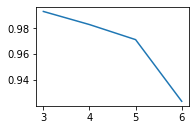

In [99]:
silhouette_scores = []
evaluator = ClusteringEvaluator(predictionCol = 'prediction', featuresCol = 'features', metricName = 'silhouette', distanceMeasure = 'squaredEuclidean')
for i in range(3, 7):
    kmeans = KMeans(k=i, seed=0)
    km_model = kmeans.fit(data_features)
    centers = km_model.clusterCenters()
    #print(centers)
    transformed = km_model.transform(data_features)
    #transformed.show()
    score = evaluator.evaluate(transformed)
    print('the score is:')
    print(score)
    silhouette_scores.append(score)

ax = plt.subplot(222)
ax.plot(range(3,7), silhouette_scores)
plt.show()

In [102]:
kmeans = KMeans(k=3, seed=0)
data_features_sample = data_features.sample(fraction = 0.5)
#print(data_features_sample)
print(data_features_sample.count())
#data_features_sample.show()

5419


In [104]:
km_model = kmeans.fit(data_features_sample)
centers = km_model.clusterCenters()
print(centers)
transformed = km_model.transform(data_features_sample)
features_rows = transformed.select('features').collect()
result_rows = transformed.select('prediction').collect()

from pyspark.mllib.linalg import SparseVector, DenseVector

features_list = [DenseVector(row.features.toArray()).tolist() for row in features_rows]
result_list = [row.prediction for row in result_rows]


[array([7.31148485e+01, 1.90567181e+02, 8.59272339e-02]), array([1.1450000e+02, 2.9508700e+04, 1.0651103e-01]), array([1.99035714e+02, 9.99228571e+03, 1.16597715e-01])]


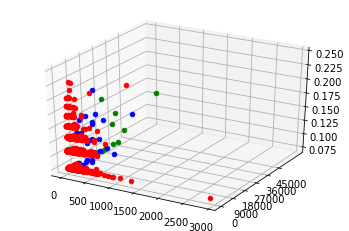

In [115]:
color = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
ax2 = plt.subplot(111, projection='3d')
#ax = plt.subplot(111)
ax2.set_yticks([i for i in range(0, 45001, 9000)])
for i in range(0, len(features_list)):
    ax2.scatter(features_list[i][0],features_list[i][1],features_list[i][2], c=color[result_list[i]])
plt.show()

In [111]:
cos_sim_list = [i[2] for i in features_list]

In [113]:
print('min: ' + str(min(cos_sim_list)))
print('max: ' + str(max(cos_sim_list)))

min: 0.07692307692307693
max: 0.24325212770525992


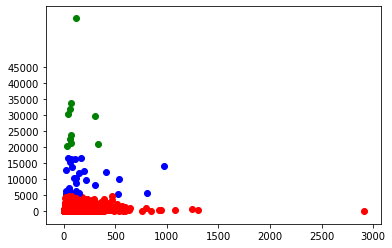

In [118]:
ax3 = plt.subplot(111)
ax3.set_yticks([i for i in range(0, 45001, 5000)])
for i in range(0, len(features_list)):
    ax3.scatter(features_list[i][0],features_list[i][1], c=color[result_list[i]])
plt.show()

In [120]:
print(result_list.count(0))
print(result_list.count(1))
print(result_list.count(2))
print(len(result_list))

5381
10
28
5419
